<a href="https://colab.research.google.com/github/lazarzivanovicc/pyspark-hf-predictions/blob/main/MiningMassiveDataSetsFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will focus on solving Heart Failure prediction using PySpark and [Heart Failure Prediction - Clinical Records](https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records/data) data set from Kaggle


This dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

Attribute Information:


*   age: age of the patient (years)
*   anaemia: decrease of red blood cells or hemoglobin (boolean)
*   creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
*   diabetes: if the patient has diabetes (boolean)
*   ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
*   high blood pressure: if the patient has hypertension (boolean)
*   platelets: platelets in the blood (kiloplatelets/mL)
*   sex: woman or man (binary)
*   serum creatinine: level of serum creatinine in the blood (mg/dL)
*   serum sodium: level of serum sodium in the blood (mEq/L)
*   smoking: if the patient smokes or not (boolean)
*   time: follow-up period (days)
*   [TARGET] DEATH_EVENT: if the patient died during the follow-up period (boolean)







This project will focus on finding the model for predicting survival of a patient with heart failure

As this is classification problem (binnary classification) I will implement XGBoost Classfier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = 'gdrive/My Drive/data/heart_failure_clinical_records.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


In [ ]:
# Check for null values
null_values_count = data.isnull().sum()

null_values_count

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


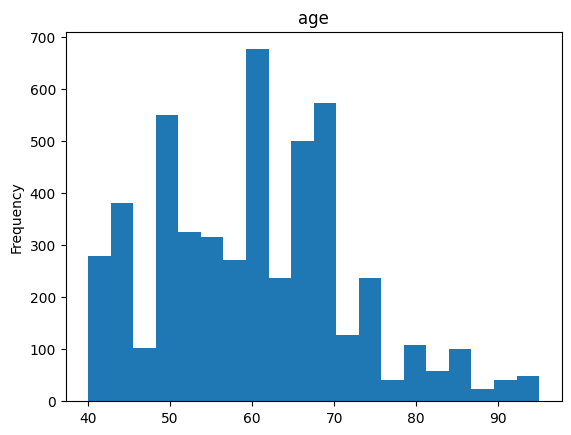

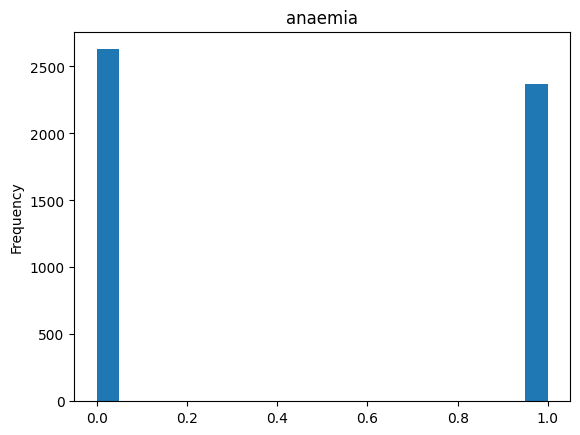

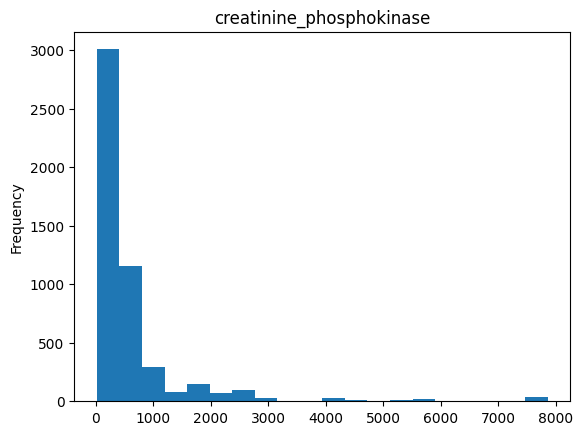

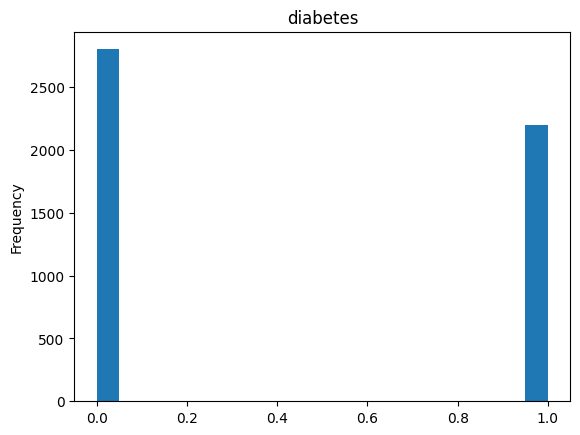

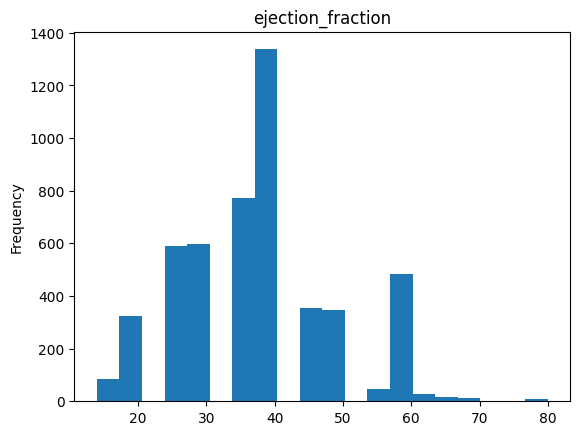

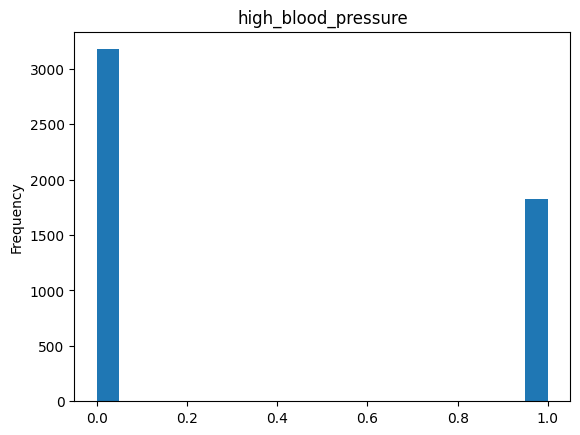

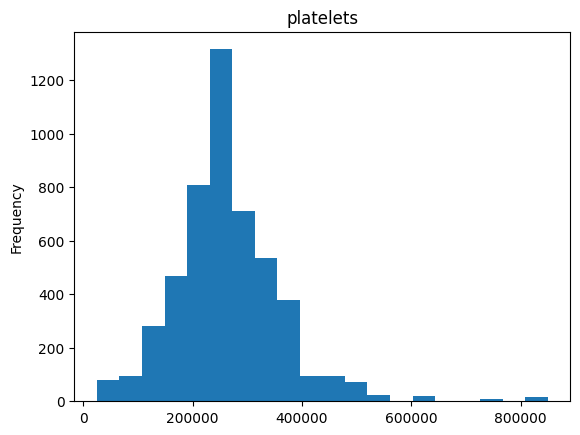

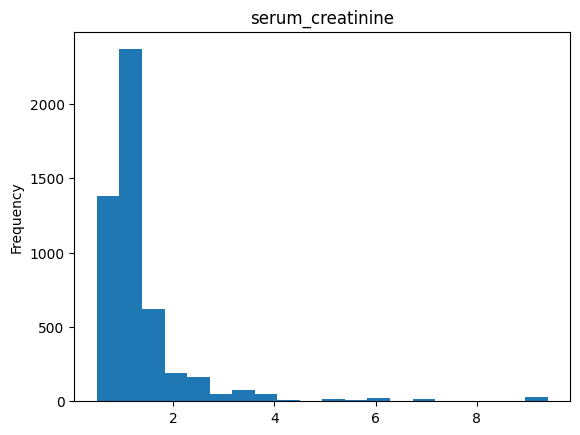

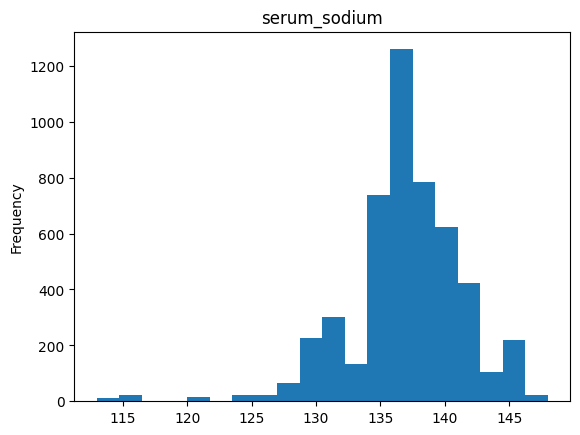

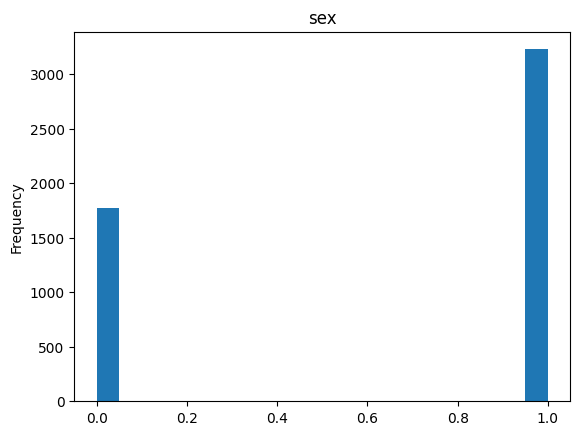

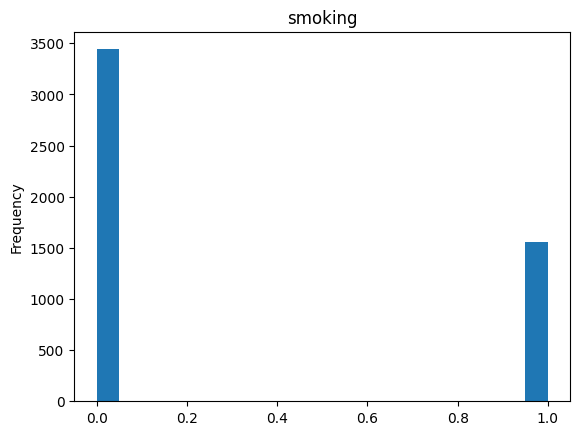

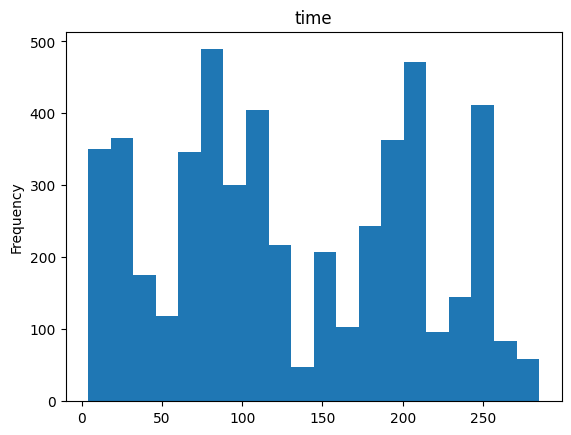

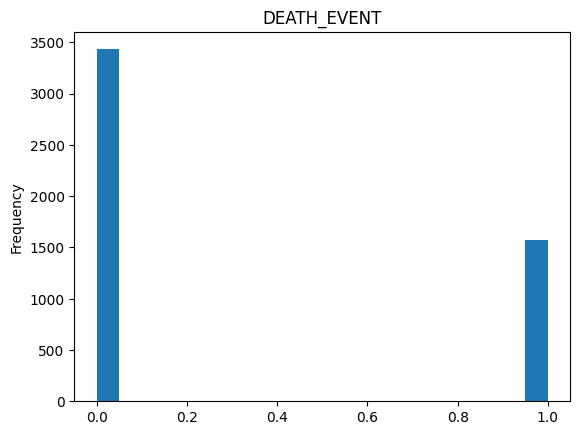

In [ ]:
# Data visualization
for column in data.columns:
  data[column].plot(kind='hist', bins=20, title=column)
  plt.show()

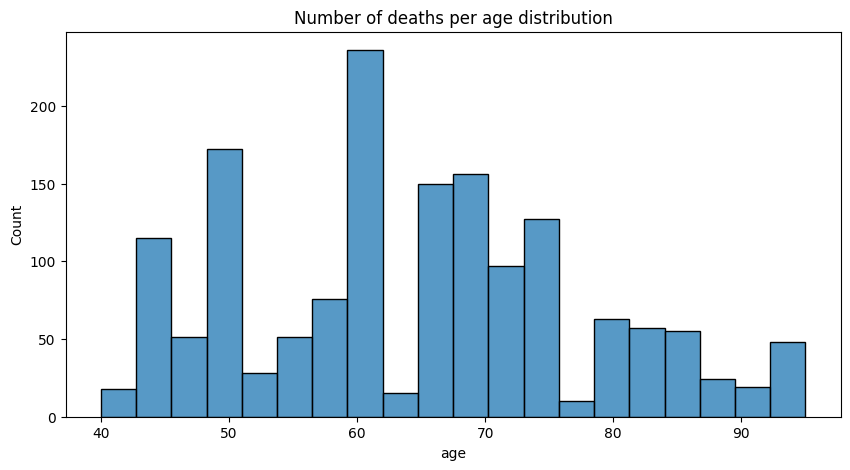

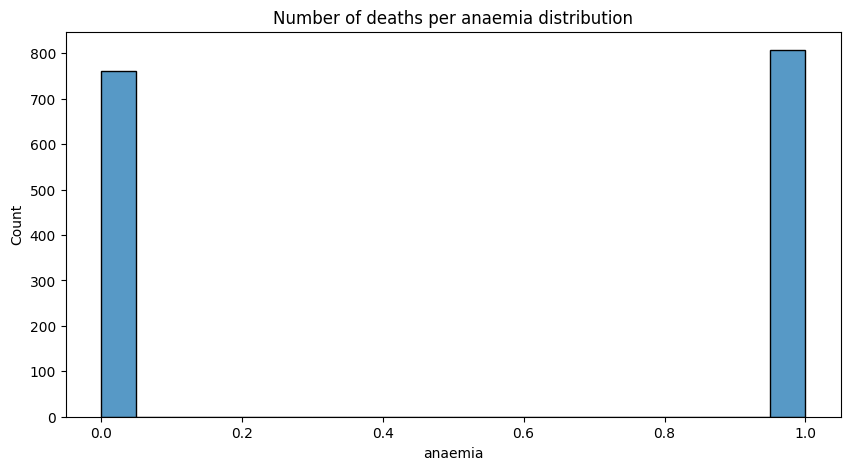

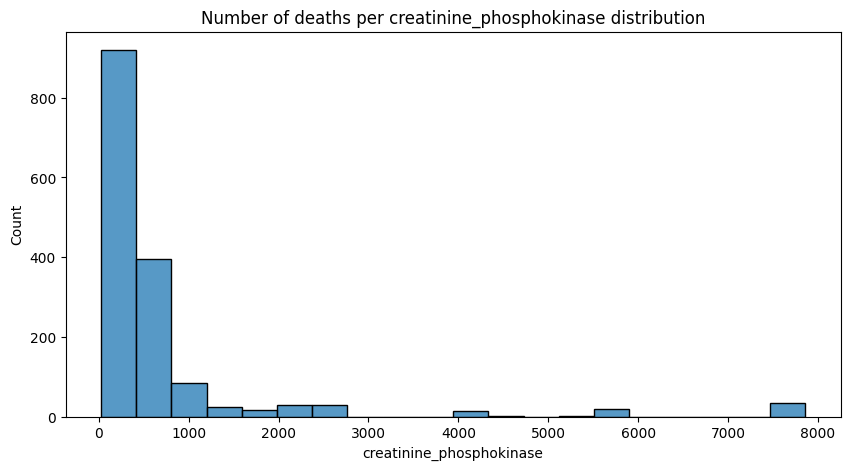

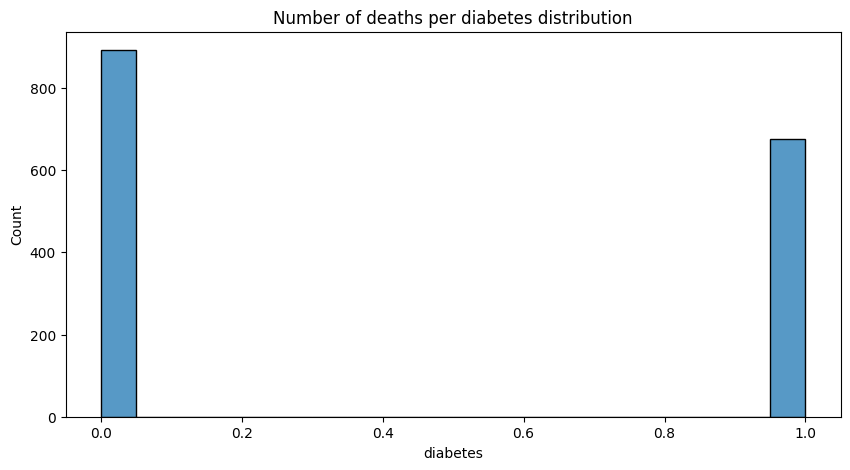

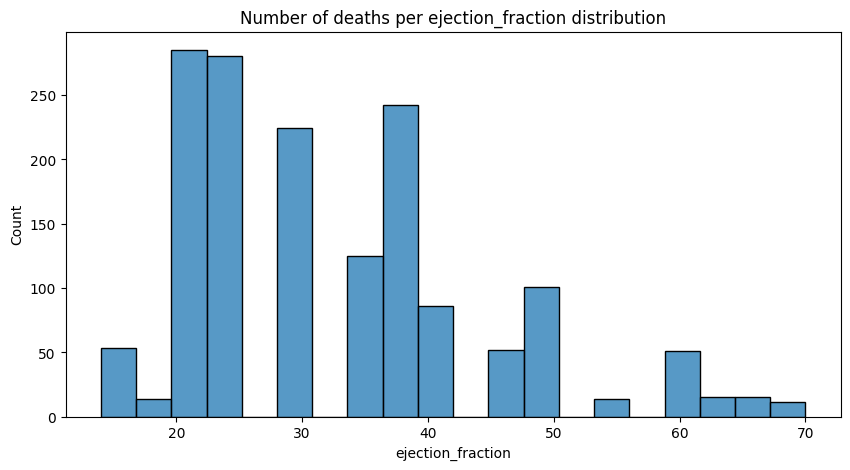

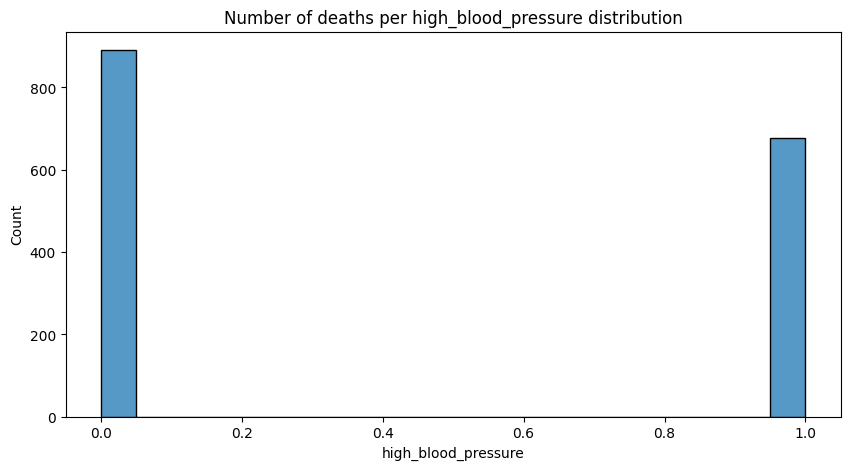

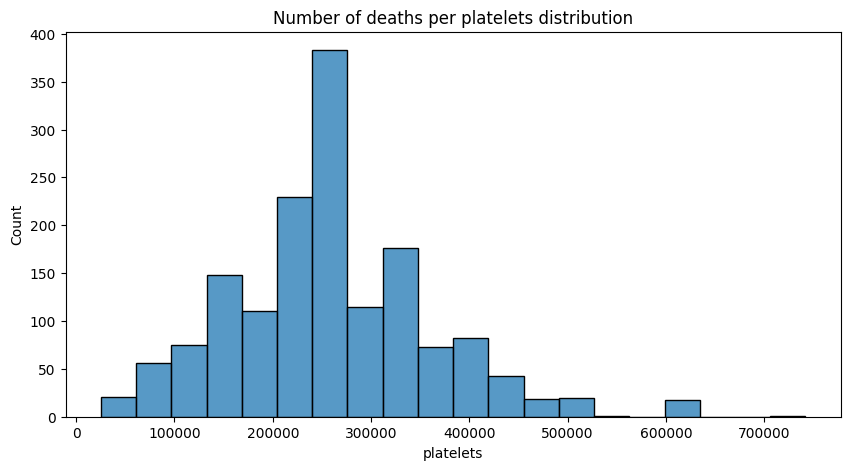

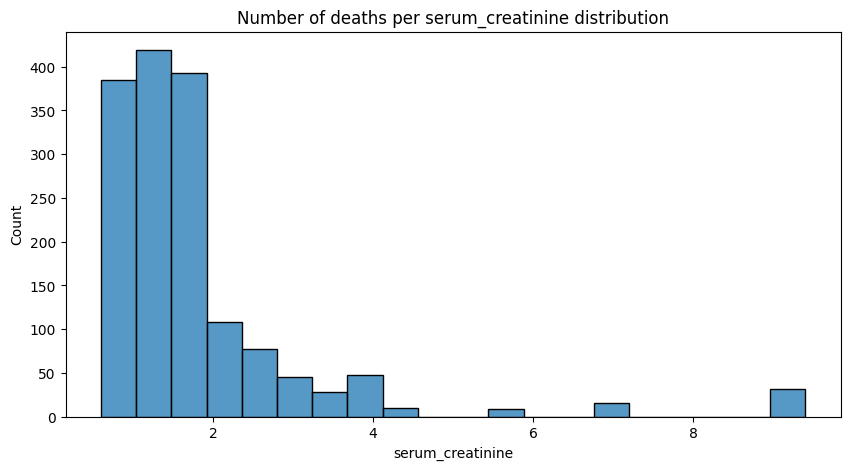

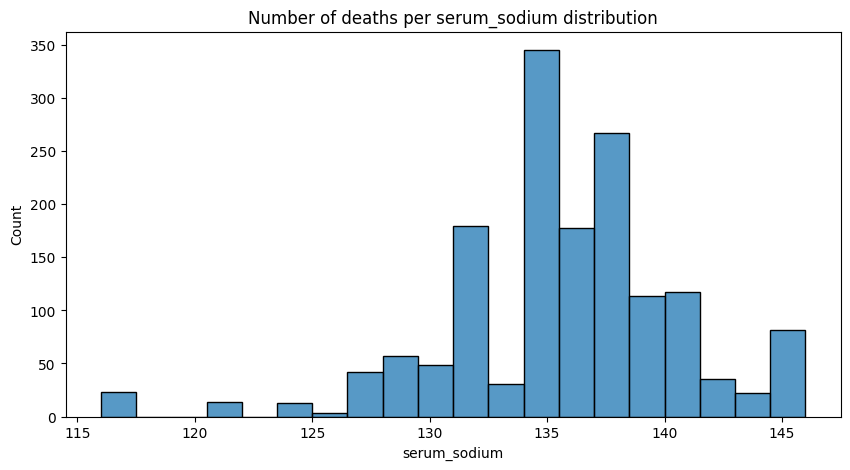

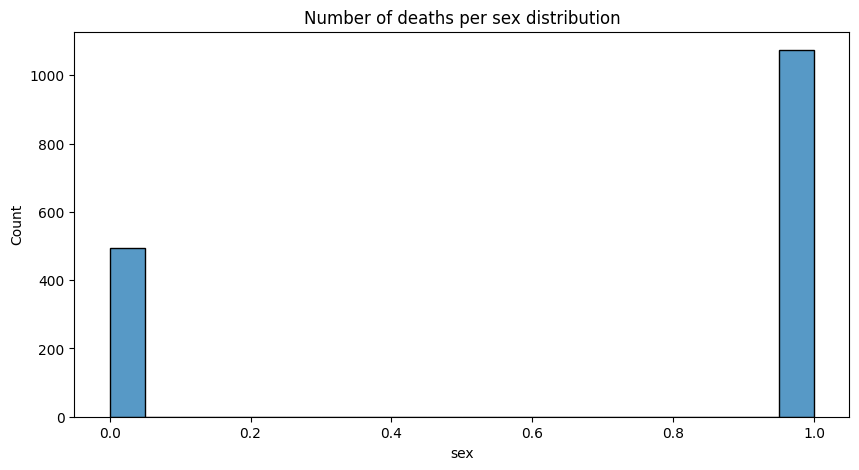

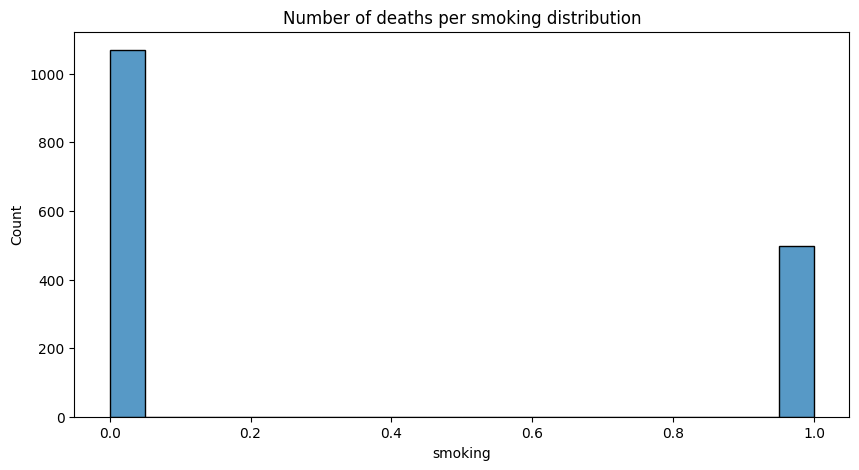

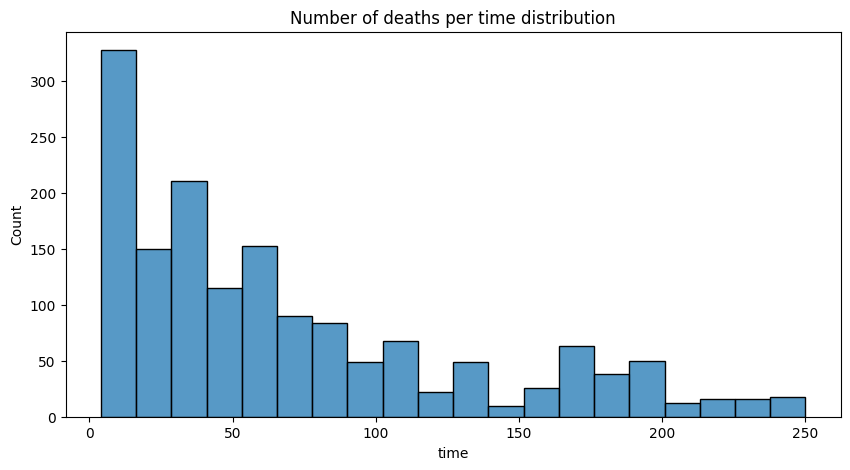

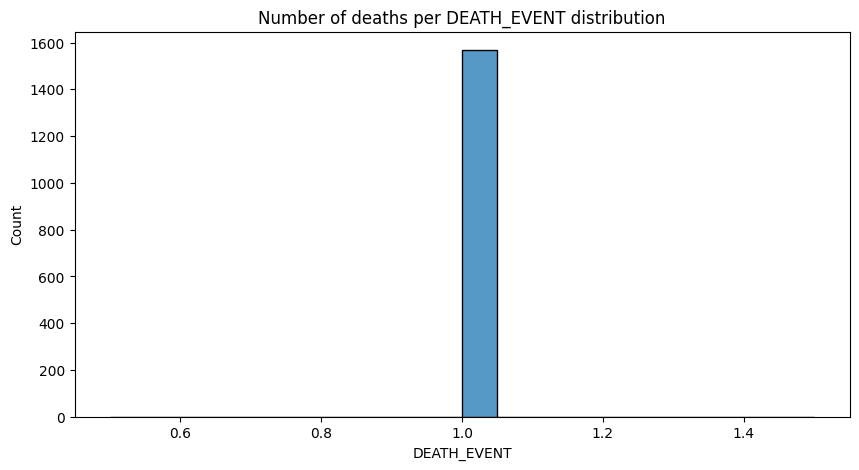

In [ ]:
deceased_df = data[data['DEATH_EVENT'] == 1]
for column in data.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(data=deceased_df, x=column, bins=20)
  plt.title(f'Number of deaths per {column} distribution')
  plt.show()

In [ ]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


<Axes: >

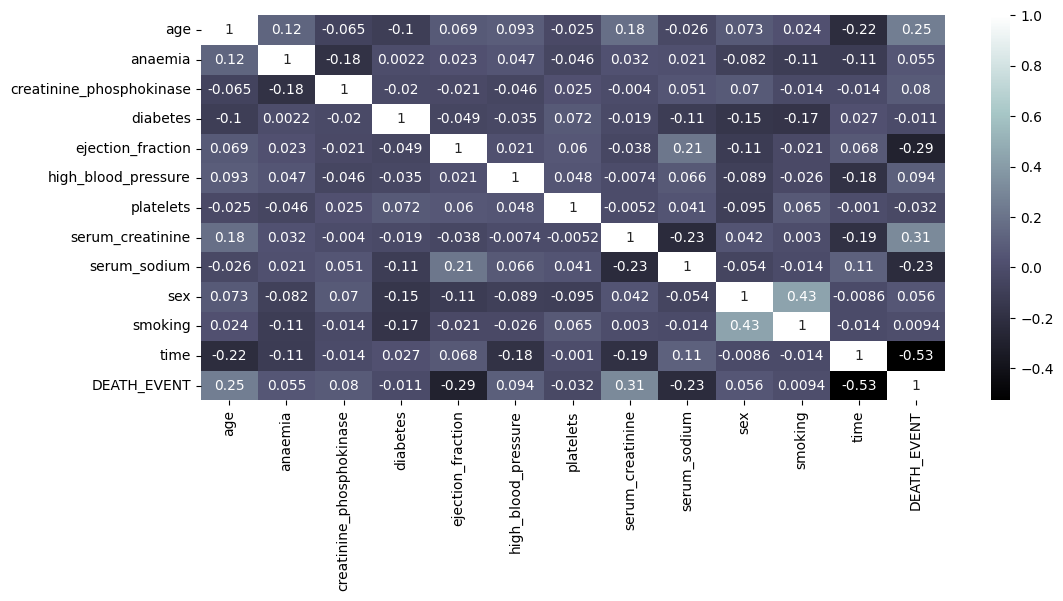

In [ ]:
plt.figure(figsize = (12, 5))
sns.heatmap(data.corr(), annot=True, cmap='bone')

By looking at the heathmap we can see that DEATH_EVENT has the highest correlation with age, serum_creatinine and higehest negative correlation with ejection_fraction, serum_sodium, time

Pyspark

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=776d63d7bbb16173be5122ed2944e0663895d4ec9384b0d8d0d8e1919d9c9a1a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HeartFailure").getOrCreate()

In [ ]:
# converting pandas dataframe into spark dataframe

df = spark.createDataFrame(data)

In [ ]:
df.printSchema()

root
 |-- age: double (nullable = true)
 |-- anaemia: long (nullable = true)
 |-- creatinine_phosphokinase: long (nullable = true)
 |-- diabetes: long (nullable = true)
 |-- ejection_fraction: long (nullable = true)
 |-- high_blood_pressure: long (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- smoking: long (nullable = true)
 |-- time: long (nullable = true)
 |-- DEATH_EVENT: long (nullable = true)



In [ ]:
print(f'Number of columns: {len(df.columns)}\nNumber of rows: {df.count()}')

Number of columns: 13
Number of rows: 5000


In [ ]:
from pyspark.ml.feature import VectorAssembler

# when assembling feature vector I will ignore columns with correlation in range from 0.05 to -0.05 because our model wont draw much from them

assembler = VectorAssembler(inputCols = [
    'age',
    'anaemia',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'high_blood_pressure',
    'serum_creatinine',
    'serum_sodium',
    'sex',
    'time'
  ], outputCol='features')


df = assembler.transform(df)

In [ ]:
df.show(5)

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+--------------------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|            features|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+--------------------+
|55.0|      0|                     748|       0|               45|                  0|263358.03|             1.3|         137|  1|      1|  88|          0|[55.0,0.0,748.0,4...|
|65.0|      0|                      56|       0|               25|                  0| 305000.0|             5.0|         130|  1|      0| 207|          0|[65.0,0.0,56.0,25...|
|45.0|      0|                     582|       1|               38|                  0| 319000.0|             0.9|  

In [ ]:
df_ready = df.select(['features', 'DEATH_EVENT'])

In [ ]:
df_ready.show(5)

+--------------------+-----------+
|            features|DEATH_EVENT|
+--------------------+-----------+
|[55.0,0.0,748.0,4...|          0|
|[65.0,0.0,56.0,25...|          0|
|[45.0,0.0,582.0,3...|          0|
|[60.0,1.0,754.0,4...|          0|
|[95.0,1.0,582.0,3...|          1|
+--------------------+-----------+
only showing top 5 rows



In [ ]:
train_df, test_df = df_ready.randomSplit([0.7, 0.3], 45)

For my problem I decided to use XGBoost algorithm. XGBoost (Extreme Gradient Boosting) is a popular algorithm for classification (can be used for regression) due to its efficiency, accuracy, and flexibility.

XGBoost is known for its superior performance and accuracy, often outperforming other algorithms in various machine learning competitions and practical applications. XGBoost builds an ensemble of trees sequentially, where each tree tries to correct the errors of the previous ones. This iterative approach helps in improving the model’s accuracy.



In [ ]:
from xgboost.spark import SparkXGBClassifier

xgb_classifier = SparkXGBClassifier(features_col='features', label_col='DEATH_EVENT')

model = xgb_classifier.fit(train_df)

INFO:XGBoost-PySpark:Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


In [ ]:
predictions_df = model.transform(test_df)
predictions_df.show(30)

+--------------------+-----------+--------------------+----------+--------------------+
|            features|DEATH_EVENT|       rawPrediction|prediction|         probability|
+--------------------+-----------+--------------------+----------+--------------------+
|[40.0,0.0,90.0,35...|          0|[8.51672554016113...|       0.0|[0.99979996681213...|
|[40.0,0.0,90.0,35...|          0|[8.51672554016113...|       0.0|[0.99979996681213...|
|[40.0,0.0,280.0,3...|          0|[5.56204938888549...|       0.0|[0.99617379903793...|
|[40.0,0.0,582.0,3...|          0|[6.96620893478393...|       0.0|[0.99905765056610...|
|[40.0,1.0,80.0,35...|          0|[7.35684537887573...|       0.0|[0.99936217069625...|
|[40.0,1.0,100.0,3...|          0|[8.55236053466796...|       0.0|[0.99980694055557...|
|[40.0,1.0,129.0,3...|          0|[8.51702022552490...|       0.0|[0.99980002641677...|
|[40.0,1.0,129.0,3...|          0|[8.51702022552490...|       0.0|[0.99980002641677...|
|[40.0,1.0,129.0,3...|          

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='DEATH_EVENT')

print(evaluator.evaluate(predictions_df))

0.9998522379238086


Evaluator calculates AUC (Area Under the ROC). AUC is the common evaluation metric used for binary classification, value close to 1 means great classification, value of 0.5 would mean that our model is no better than random guessing, and lower values than 0.5 mean that model is worse than random guess. This model performed exceptionaly well having AUC of 0.999 (test set was used for predictions)